### About NETFLIX

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

### Business Problem

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

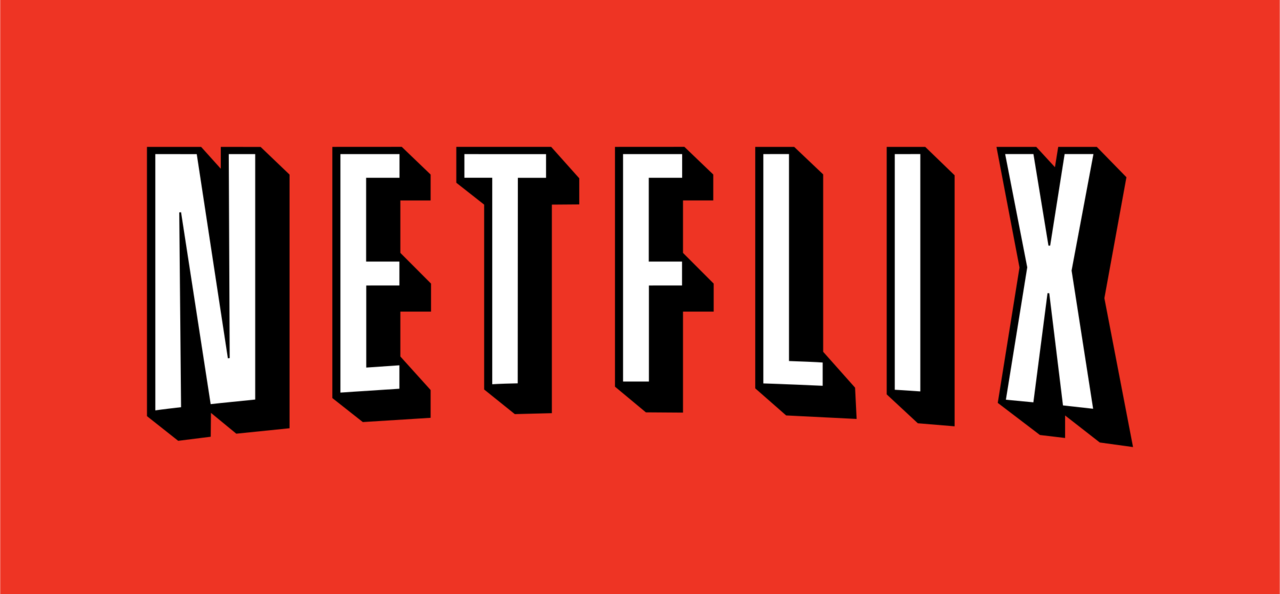

## Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/netflix.csv')

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Baisc Descriptive statistsics

In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

#Seems to be there are lot of missing values in the director column, followed by cast and country.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


## Missing Values

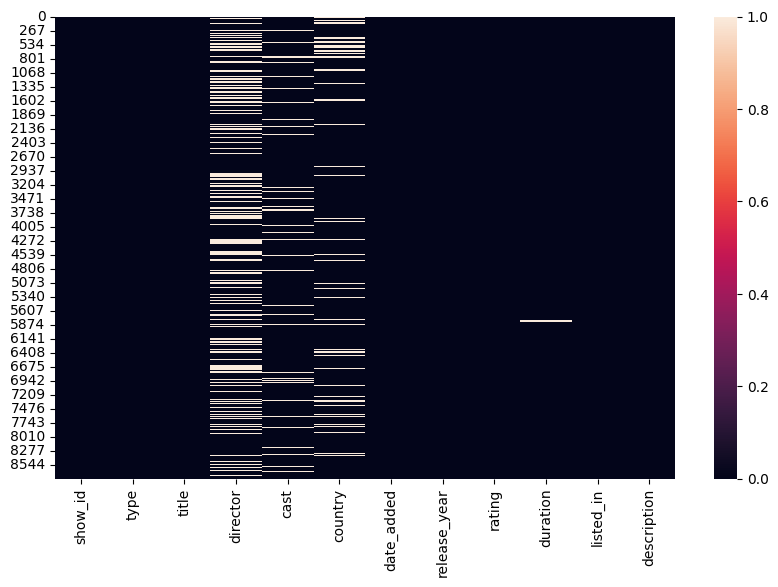

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.show()

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Exploratory Data Analysis



In [9]:
df.loc[:,'cast'] = df['cast'].str.split(', ')
df = df.explode('cast')

In [10]:
df.loc[:,'listed_in'] = df['listed_in'].str.split(', ')
df = df.explode('listed_in')

In [11]:
df.loc[:,'country'] = df['country'].str.split(', ')
df = df.explode('country')

In [12]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

In [13]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9.0,2021.0


In [14]:
df_title_types = df[['title','type','country','rating','duration']].drop_duplicates()

Movie      7814
TV Show    3031
Name: type, dtype: int64


<Axes: xlabel='type', ylabel='count'>

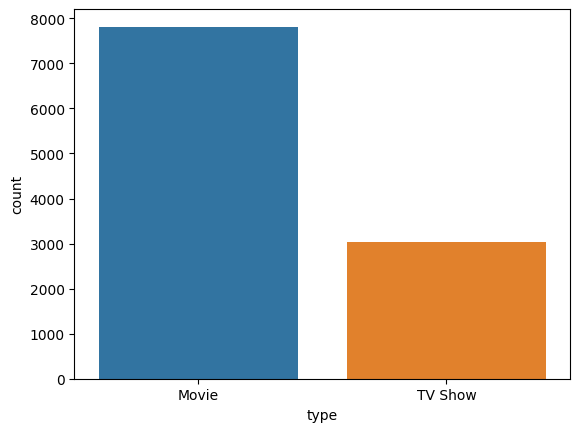

In [20]:
print(df_title_types['type'].value_counts())
sns.countplot(x = df_title_types['type'])

In [21]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

In [22]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [23]:
df[df['date_added'].dt.year < df['release_year']]['title'].unique()

array(['Hilda', 'Polly Pocket', 'Love Is Blind', 'Fuller House',
       'Maradona in Mexico', 'BoJack Horseman', 'The Hook Up Plan',
       'Unbreakable Kimmy Schmidt', 'Arrested Development',
       'Hans Teeuwen: Real Rancour', 'Sense8', 'Tokyo Trial', 'Incoming',
       'Jack Taylor'], dtype=object)

In [24]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9.0,2021.0


In [25]:
df[df['date_added'].dt.year < df['release_year']]['date_added'].dt.month.unique()

array([12, 11,  2, 10,  5,  7,  3])

In [26]:
df[df['date_added'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,Daniel Radcliffe,United Kingdom,NaT,2013,TV-MA,2 Seasons,British TV Shows,"Set during the Russian Revolution, this comic ...",NaN,NaN
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,Daniel Radcliffe,United Kingdom,NaT,2013,TV-MA,2 Seasons,TV Comedies,"Set during the Russian Revolution, this comic ...",NaN,NaN
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,Daniel Radcliffe,United Kingdom,NaT,2013,TV-MA,2 Seasons,TV Dramas,"Set during the Russian Revolution, this comic ...",NaN,NaN
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,Jon Hamm,United Kingdom,NaT,2013,TV-MA,2 Seasons,British TV Shows,"Set during the Russian Revolution, this comic ...",NaN,NaN
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,Jon Hamm,United Kingdom,NaT,2013,TV-MA,2 Seasons,TV Comedies,"Set during the Russian Revolution, this comic ...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,Charlotte Hamlyn,Australia,NaT,2015,TV-Y7,2 Seasons,TV Comedies,"Imagine your worst fears, then multiply them: ...",NaN,NaN
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,Stavroula Mountzouris,Australia,NaT,2015,TV-Y7,2 Seasons,Kids' TV,"Imagine your worst fears, then multiply them: ...",NaN,NaN
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,Stavroula Mountzouris,Australia,NaT,2015,TV-Y7,2 Seasons,TV Comedies,"Imagine your worst fears, then multiply them: ...",NaN,NaN
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,Aletheia Burney,Australia,NaT,2015,TV-Y7,2 Seasons,Kids' TV,"Imagine your worst fears, then multiply them: ...",NaN,NaN


## Actor Analysis

In [27]:
#Total number of actors

print(f"Total number of Actors: {df['cast'].nunique()}")

Total number of Actors: 36439


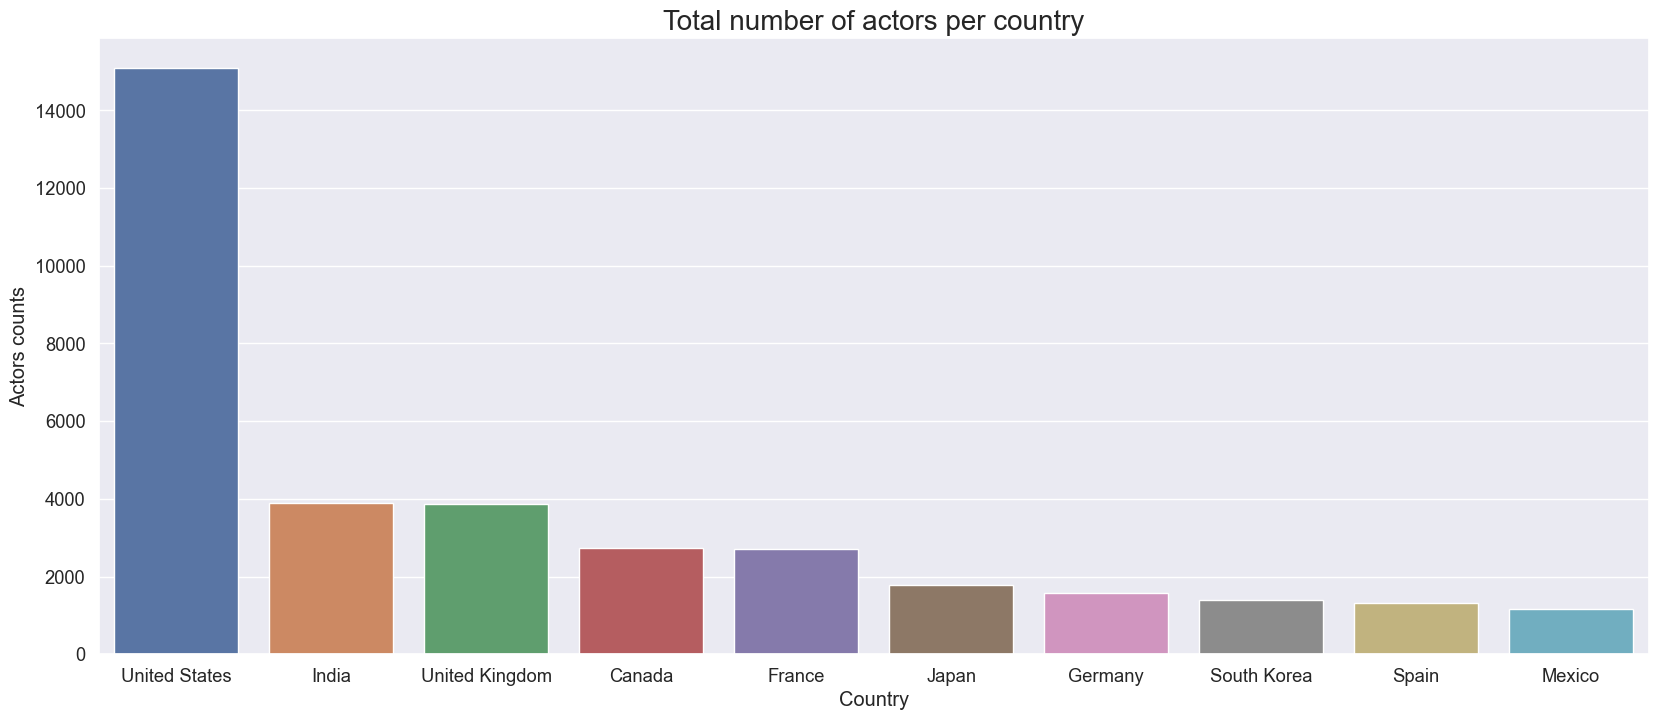

In [28]:
#Total number of actors per country

df_country_cast = df.groupby('country')['cast'].nunique().sort_values(ascending=False).head(10).reset_index()
sns.set(rc = {'figure.figsize':(20,8)}, font_scale = 1.2)
p = sns.barplot(x=df_country_cast['country'], y=df_country_cast['cast'])
p.set_xlabel("Country")
p.set_ylabel("Actors counts")
p.set_title("Total number of actors per country",fontsize = 20)
plt.show()

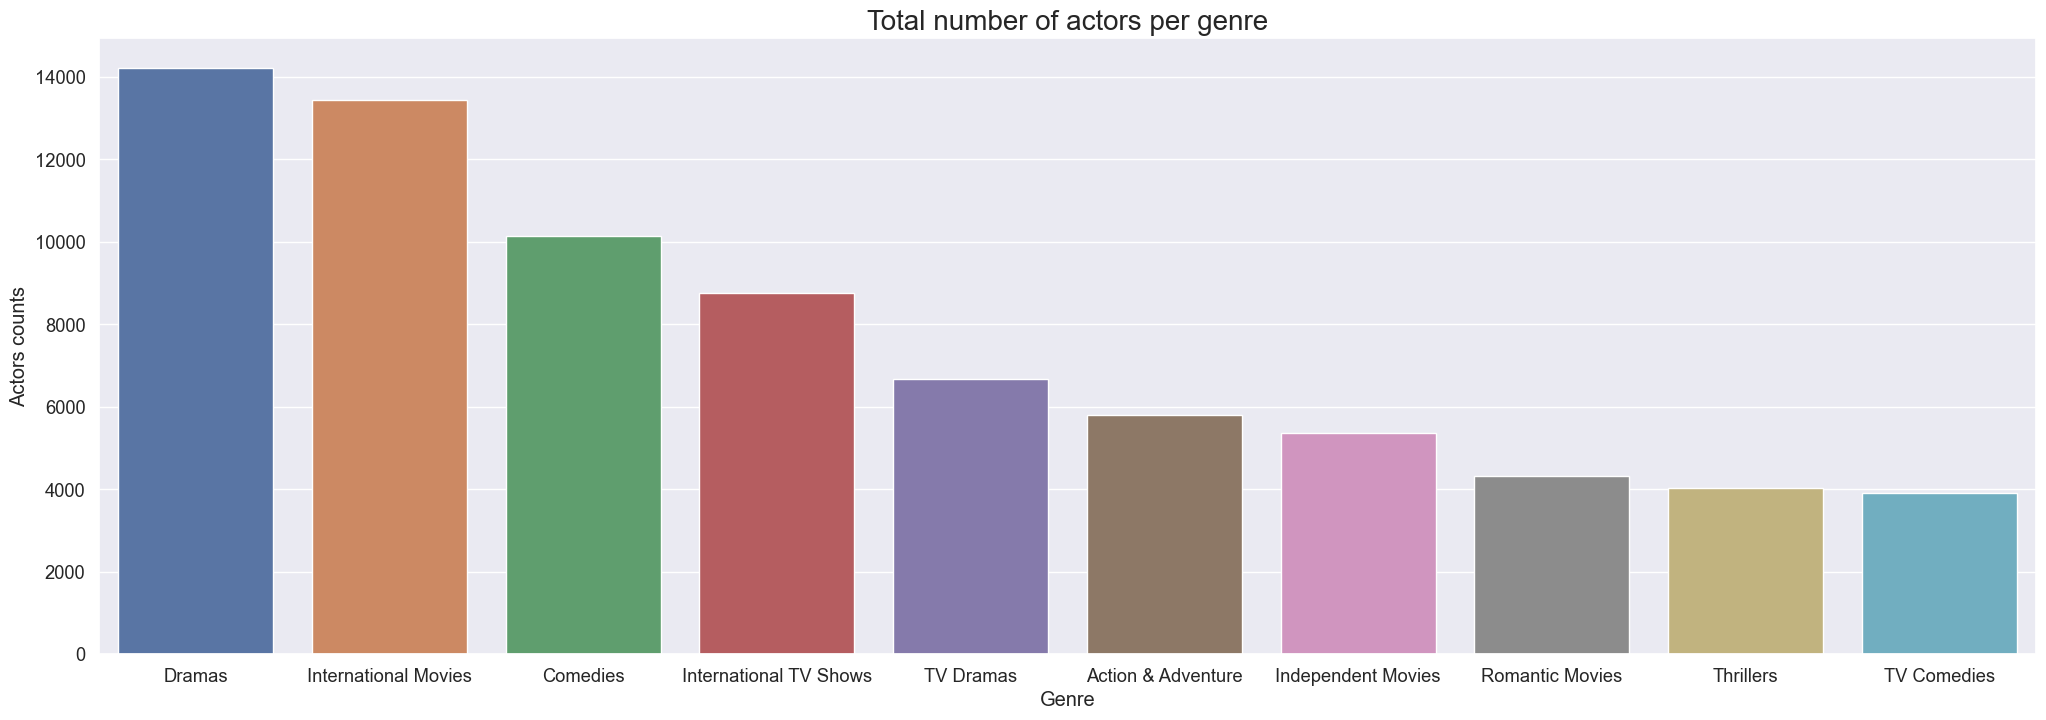

In [29]:
#Total number of actors per genre

df_genre_cast = df.groupby('listed_in')['cast'].nunique().sort_values(ascending=False).head(10).reset_index()
sns.set(rc = {'figure.figsize':(25,8)}, font_scale = 1.2)
p = sns.barplot(x=df_genre_cast['listed_in'], y=df_genre_cast['cast'])
p.set_xlabel("Genre")
p.set_ylabel("Actors counts")
p.set_title("Total number of actors per genre",fontsize = 20)
plt.show()

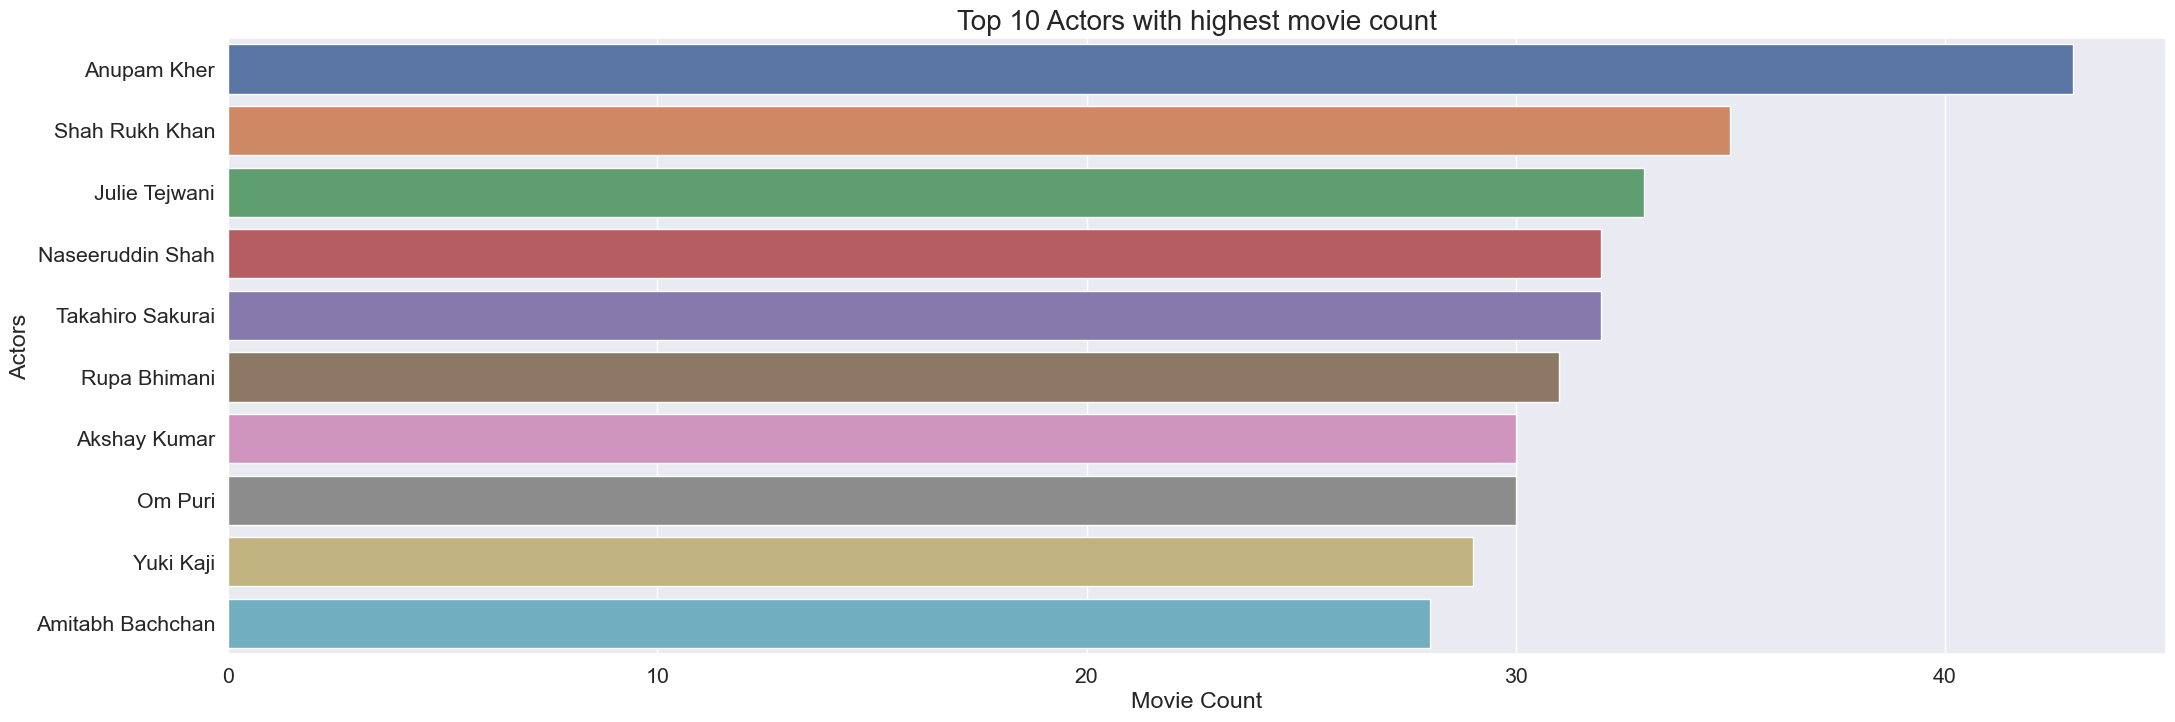

             actors  movie_count
0       Anupam Kher           43
1    Shah Rukh Khan           35
2     Julie Tejwani           33
3  Naseeruddin Shah           32
4  Takahiro Sakurai           32
5      Rupa Bhimani           31
6      Akshay Kumar           30
7           Om Puri           30
8         Yuki Kaji           29
9  Amitabh Bachchan           28


In [30]:
#Number of movies per actor globally (Top 10 Actors with highest movie count)

df_actors_movies = df.groupby('cast')['title'].nunique().sort_values(ascending=False).head(10).reset_index().rename(columns={'title':'movie_count', 'cast':'actors'})
sns.set(rc = {'figure.figsize':(25,8)}, font_scale = 1.4)
p = sns.barplot(x=df_actors_movies['movie_count'], y=df_actors_movies['actors'])
p.set_xlabel("Movie Count")
p.set_ylabel("Actors")
p.set_title("Top 10 Actors with highest movie count",fontsize = 20)
plt.show()

print(df_actors_movies)

In [31]:
# Most popular actor per country by movie count.
df_movies = df.groupby(by=['cast','country'])['title'].nunique().sort_values(ascending=False).reset_index().rename(columns={'title':'movie_count', 'cast':'actors'})
df_country_actors_moviecount = df_movies.groupby('country')['country','actors','movie_count'].head(1)

df_country_actors_moviecount.head(10)

,country,actors,movie_count
0,India,Anupam Kher,40
5,Japan,Takahiro Sakurai,29
11,United States,Samuel L. Jackson,22
37,United Kingdom,David Attenborough,17
76,Canada,John Paul Tremblay,14
97,Turkey,Demet Akbağ,13
113,Egypt,Hassan Hosny,13
146,Nigeria,Blossom Chukwujekwu,12
186,Philippines,Kathryn Bernardo,11
311,China,Donnie Yen,10


In [32]:
# Most popular actor per genre by movie count.
df_genre = df.groupby(by=['cast', 'listed_in'])['title'].nunique().sort_values(ascending=False).reset_index().rename(columns={'title':'movie_count', 'cast':'actors','listed_in':'genre'})
df_genre.groupby('genre')['genre','actors','movie_count'].head(1).head(10)

,genre,actors,movie_count
0,International Movies,Anupam Kher,38
2,Dramas,Shah Rukh Khan,28
8,Children & Family Movies,Julie Tejwani,26
13,Anime Series,Takahiro Sakurai,24
15,International TV Shows,Takahiro Sakurai,22
19,Comedies,Anupam Kher,20
78,Docuseries,David Attenborough,14
87,British TV Shows,David Attenborough,13
104,Action & Adventure,Bruce Willis,13
109,Kids' TV,Vincent Tong,13


In [33]:
# Most popular actor per type by movie count.
df_actors_type = df.groupby(by=['cast', 'type','country'])['title'].nunique().sort_values(ascending=False).reset_index().rename(columns={'title':'count','cast':'actors'})
#df_actors_type.groupby(['country','type'])['country','type'].head(1)
#df_actors_type[df_actors_type['country'] == 'Philippines']
gf = df_actors_type.groupby(['country','type'])['count'].max().sort_values().reset_index()
#gf[gf['country'] == 'India']
gf.sort_values(by=['country','type'])
#Need to vist back on this.


,country,type,count
0,,Movie,1
76,,TV Show,1
73,Afghanistan,Movie,1
69,Albania,Movie,1
66,Algeria,Movie,1
...,...,...,...
27,Venezuela,Movie,1
98,Vietnam,Movie,2
26,West Germany,Movie,1
12,West Germany,TV Show,1


In [34]:
#Max number of Actors in a movie (Top 10 movies with highest numbers of actors)

df.groupby('title')['cast'].nunique().sort_values(ascending=False).reset_index().rename(columns={'cast':'actors_count'}).head(10)

,title,actors_count
0,Social Distance,50
1,Black Mirror,50
2,Creeped Out,47
3,COMEDIANS of the world,47
4,Heartbreak High,47
5,Arthur Christmas,44
6,Narcos,42
7,"Michael Bolton's Big, Sexy Valentine's Day Spe...",41
8,Dolly Parton's Heartstrings,41
9,American Horror Story,40


## Director Analysis

In [35]:
#Total number of actors

print(f"Total number of Directors: {df['director'].nunique()}")

Total number of Directors: 4528


In [36]:
# Popular Directors with highest number of movies
df.groupby(['director'])['title'].nunique().sort_values(ascending=False).reset_index().rename(columns={'title':'movie_directed'}).head(10)

,director,movie_directed
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Suhas Kadav,16
3,Marcus Raboy,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Jay Chapman,12
7,Youssef Chahine,12
8,Martin Scorsese,12
9,Steven Spielberg,11


In [37]:
# Most popular director per country by movie count.
df_movies = df.groupby(by=['director','country'])['title'].nunique().sort_values(ascending=False).reset_index().rename(columns={'title':'movie_count'})
df_country_directors_moviecount = df_movies.groupby('country')['country','director','movie_count'].head(1)

df_country_directors_moviecount.head(10)

,country,director,movie_count
0,United States,Marcus Raboy,15
2,Philippines,Cathy Garcia-Molina,13
5,Egypt,Youssef Chahine,12
8,Mexico,"Raúl Campos, Jan Suter",9
9,India,David Dhawan,9
12,Turkey,Hakan Algül,8
15,Hong Kong,Johnnie To,8
19,Nigeria,Kunle Afolayan,7
21,Canada,Justin G. Dyck,7
25,Japan,Toshiya Shinohara,7


In [38]:
# Most popular director per genre by movie count.
df_genre = df.groupby(by=['director', 'listed_in'])['title'].nunique().sort_values(ascending=False).reset_index().rename(columns={'title':'movie_count','listed_in':'genre'})
df_genre.groupby('genre')['genre','director','movie_count'].head(1).head(10)

,genre,director,movie_count
0,Children & Family Movies,Rajiv Chilaka,19
1,Stand-Up Comedy,"Raúl Campos, Jan Suter",18
4,International Movies,Cathy Garcia-Molina,13
7,Dramas,Youssef Chahine,12
10,Action & Adventure,Don Michael Paul,9
12,Comedies,David Dhawan,9
14,Classic Movies,Youssef Chahine,8
15,Romantic Movies,Cathy Garcia-Molina,8
30,Anime Features,Toshiya Shinohara,7
49,Documentaries,Vlad Yudin,6


In [39]:
#Max number of directors in a movie (Top 10 movies with highest numbers of directors)

df.groupby('title')['director'].nunique().sort_values(ascending=False).reset_index().rename(columns={'director':'directors_count'}).head(10)

#Info: We got movies with only 1 director. 

,title,directors_count
0,#Alive,1
1,Pareeth Pandaari,1
2,Paharganj,1
3,Pagpag: Nine Lives,1
4,Pagglait,1
5,Paddleton,1
6,Pad Man,1
7,Pacificum: Return to the Ocean,1
8,Pachamama,1
9,Pablo Escobar: Angel or Demon?,1


## Genre Analysis

In [40]:
#Number of movies per genre

df.groupby('listed_in')['title'].nunique().reset_index().rename(columns={'listed_in':'genre', 'title':'movie_count'}).sort_values(by=['movie_count'], ascending=False).head(10)

#Info: Top genre with highest movie count are: International Movies, Dramas, Comedies, International TV Shows, Documentaries etc.

,genre,movie_count
16,International Movies,2752
12,Dramas,2427
7,Comedies,1674
17,International TV Shows,1351
10,Documentaries,869
0,Action & Adventure,859
34,TV Dramas,763
15,Independent Movies,756
4,Children & Family Movies,641
24,Romantic Movies,616


In [41]:
#Popular genre in each country by movie count
df_movies = df.groupby(by=['listed_in','country'])['title'].nunique().sort_values(ascending=False).reset_index().rename(columns={'title':'movie_count', 'listed_in':'genre'})
df_country_genre_moviecount = df_movies.groupby('country')['country','genre','movie_count'].head(1)

df_country_genre_moviecount.head(10)

,country,genre,movie_count
0,India,International Movies,864
1,United States,Dramas,835
13,United Kingdom,British TV Shows,225
16,France,International Movies,207
25,South Korea,International TV Shows,152
26,Japan,International TV Shows,151
30,Spain,International Movies,140
38,Egypt,International Movies,99
40,Germany,International Movies,94
42,Canada,Comedies,94


## Country & Type Analysis

In [42]:
#Countries with max number of movies produced
df.groupby('country')['title'].nunique().sort_values(ascending=False).reset_index().head(10)

,country,title
0,United States,3689
1,India,1046
2,United Kingdom,804
3,Canada,445
4,France,393
5,Japan,318
6,Spain,232
7,South Korea,231
8,Germany,226
9,Mexico,169


In [43]:
def movie_type(df,name):
  df_country_type = df.groupby(['country','type'])['title'].nunique().reset_index().sort_values(by='country',ascending=False).rename(columns={'title':'count'})
  return df_country_type[df_country_type['country'] == name]

movie_type(df,'United States')

,country,type,count
178,United States,TV Show,938
177,United States,Movie,2751


## Duration

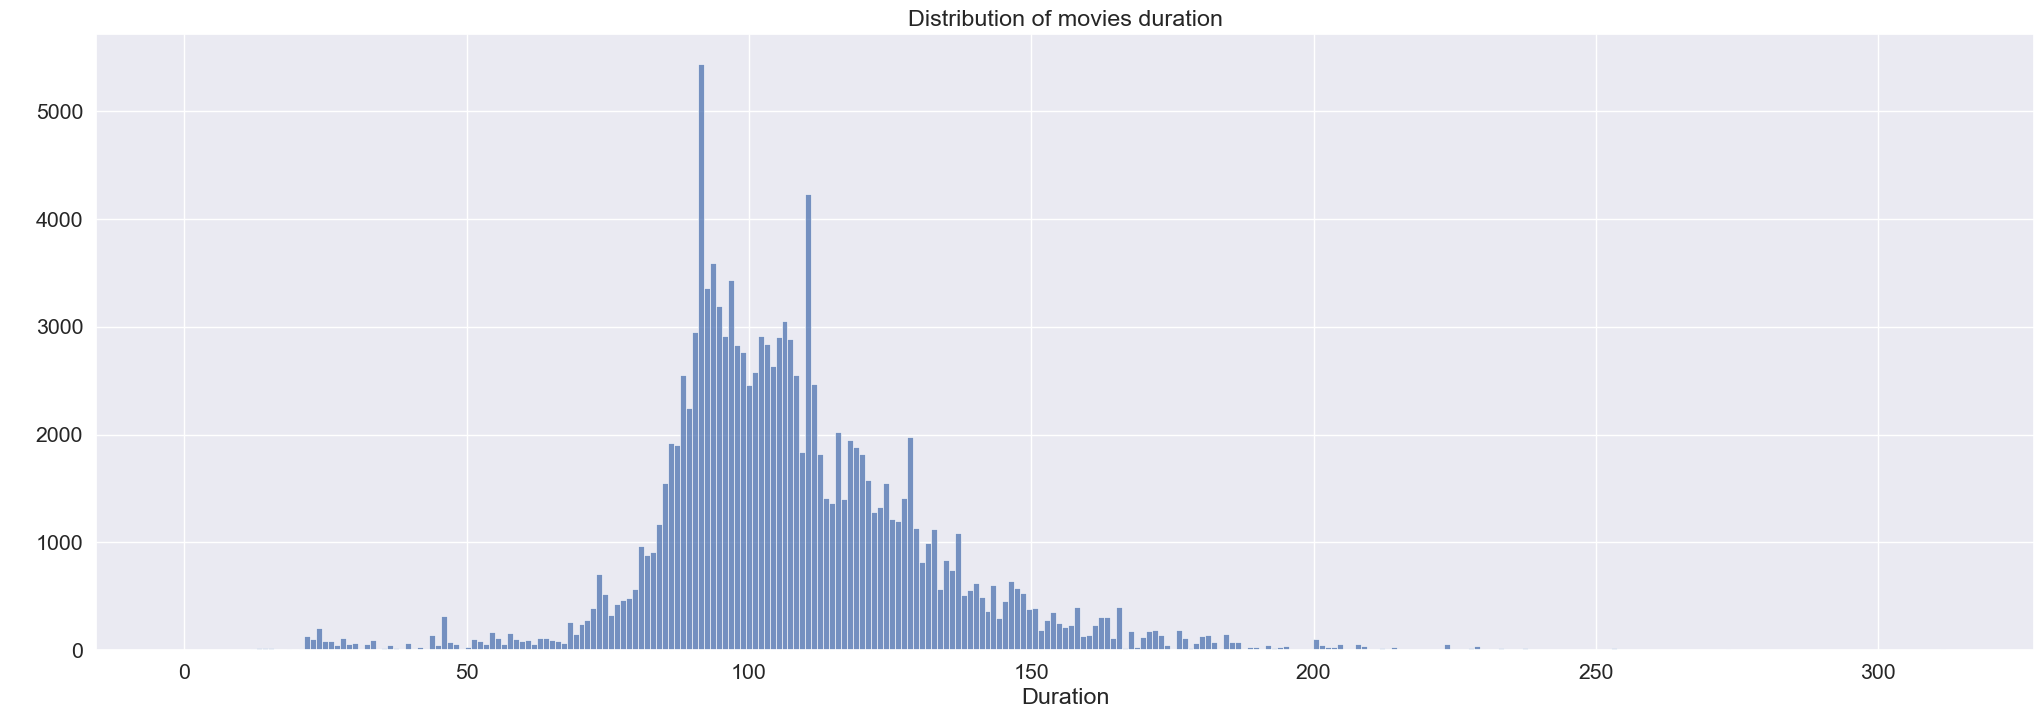

In [44]:
df['duration_mod'] = df['duration'].str.split(' ').str[0]
df['duration_mod'].fillna(0,inplace=True)
df['duration_mod'] = df['duration_mod'].astype('int')

#Movie
sns.histplot(df[df['type'] == 'Movie']['duration_mod'])
plt.xlabel('Duration')
plt.ylabel(' ')
plt.title('Distribution of movies duration')
plt.show()

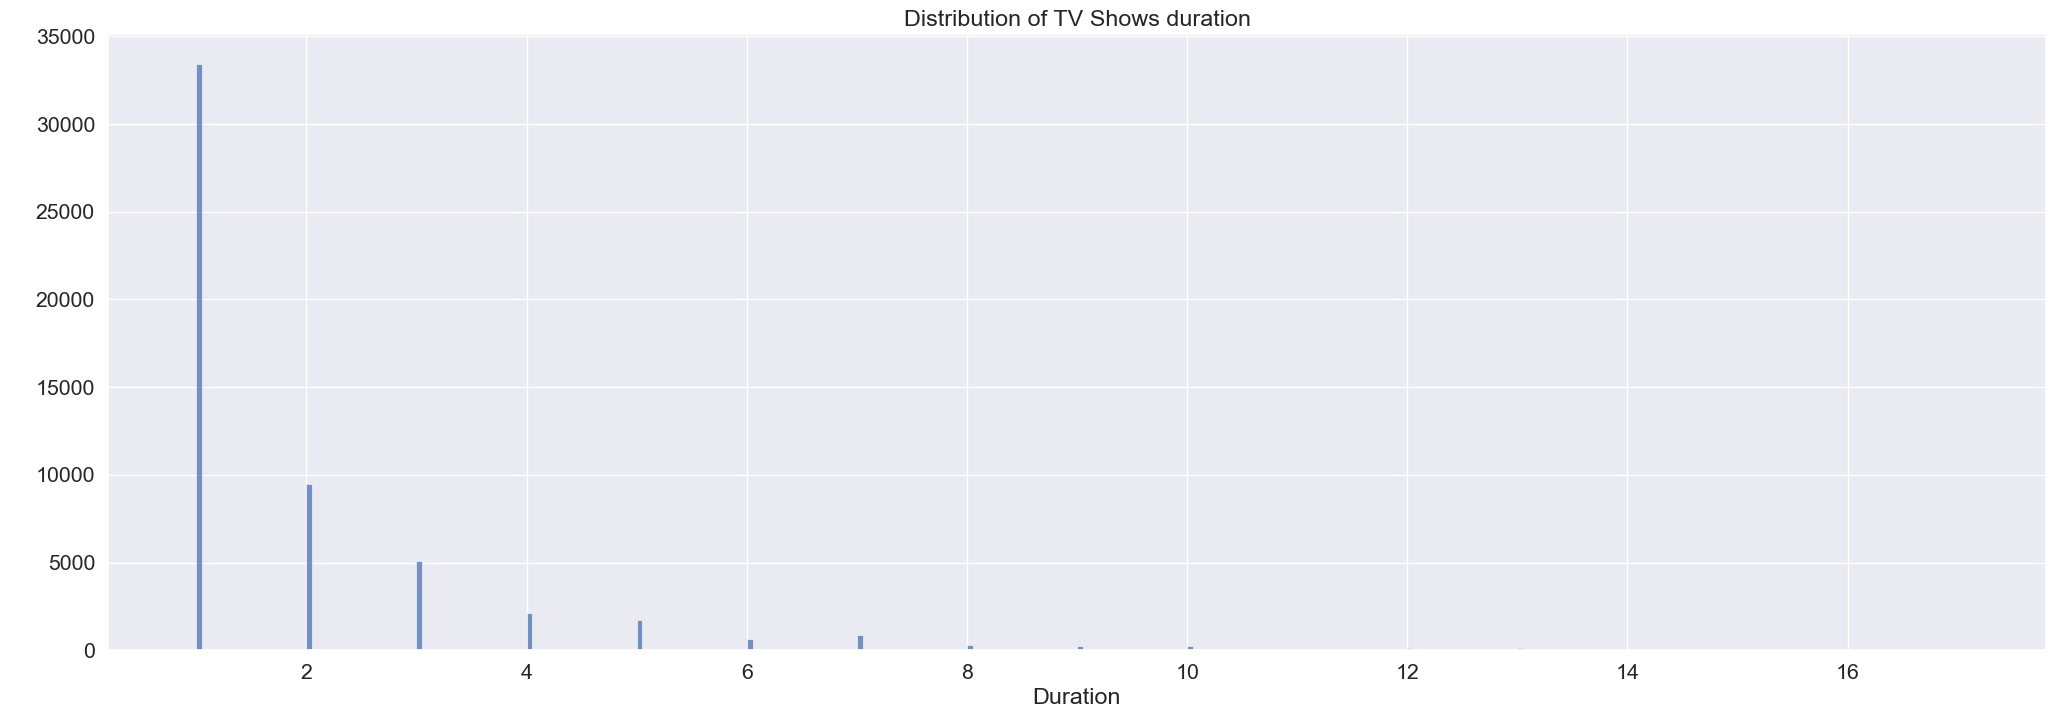

In [45]:
#Distribution of TV Shows duration
sns.histplot(df[df['type'] == 'TV Show']['duration_mod'])
plt.xlabel('Duration')
plt.ylabel(' ')
plt.title('Distribution of TV Shows duration')
plt.show()

In [46]:
df[(df['type'] == 'TV Show') & (df['duration_mod'] > 10)][['title','duration_mod']].drop_duplicates()

,title,duration_mod
548,Grey's Anatomy,17
1354,Heartland,13
2423,Supernatural,15
4220,COMEDIANS of the world,13
4798,NCIS,15
4964,Trailer Park Boys,12
5412,Criminal Minds,12
6456,Cheers,11
6795,Frasier,11
7847,Red vs. Blue,13


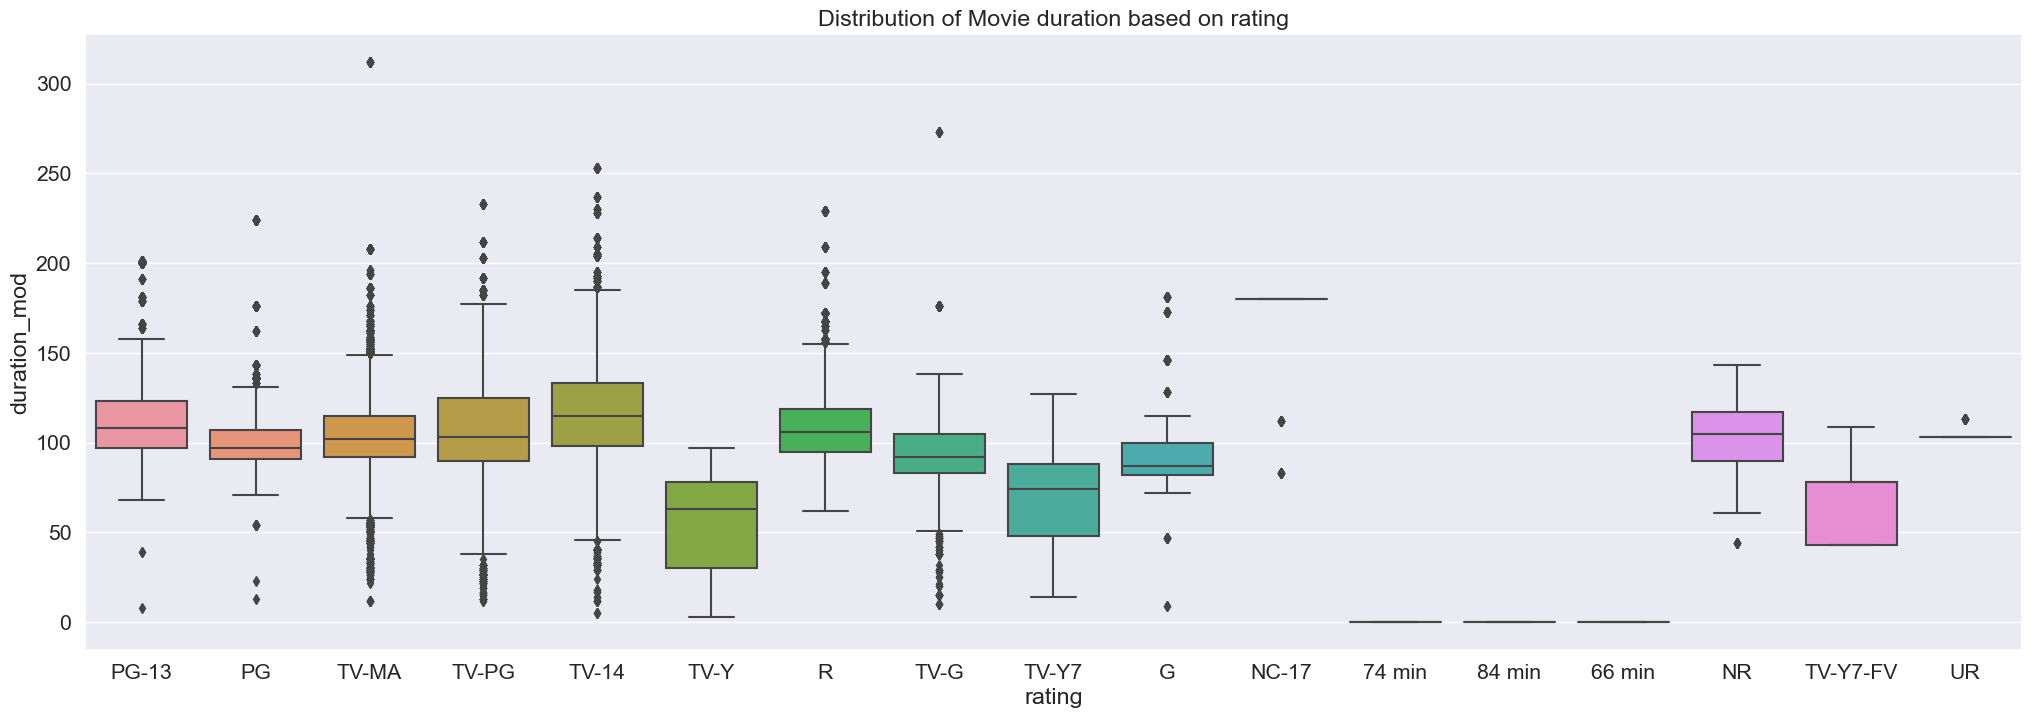

In [47]:
#Duration of Movies by Rating
sns.boxplot(x=df[df['type'] == 'Movie']['rating'], y=df[df['type'] == 'Movie']['duration_mod'])
plt.title('Distribution of Movie duration based on rating')
plt.show()

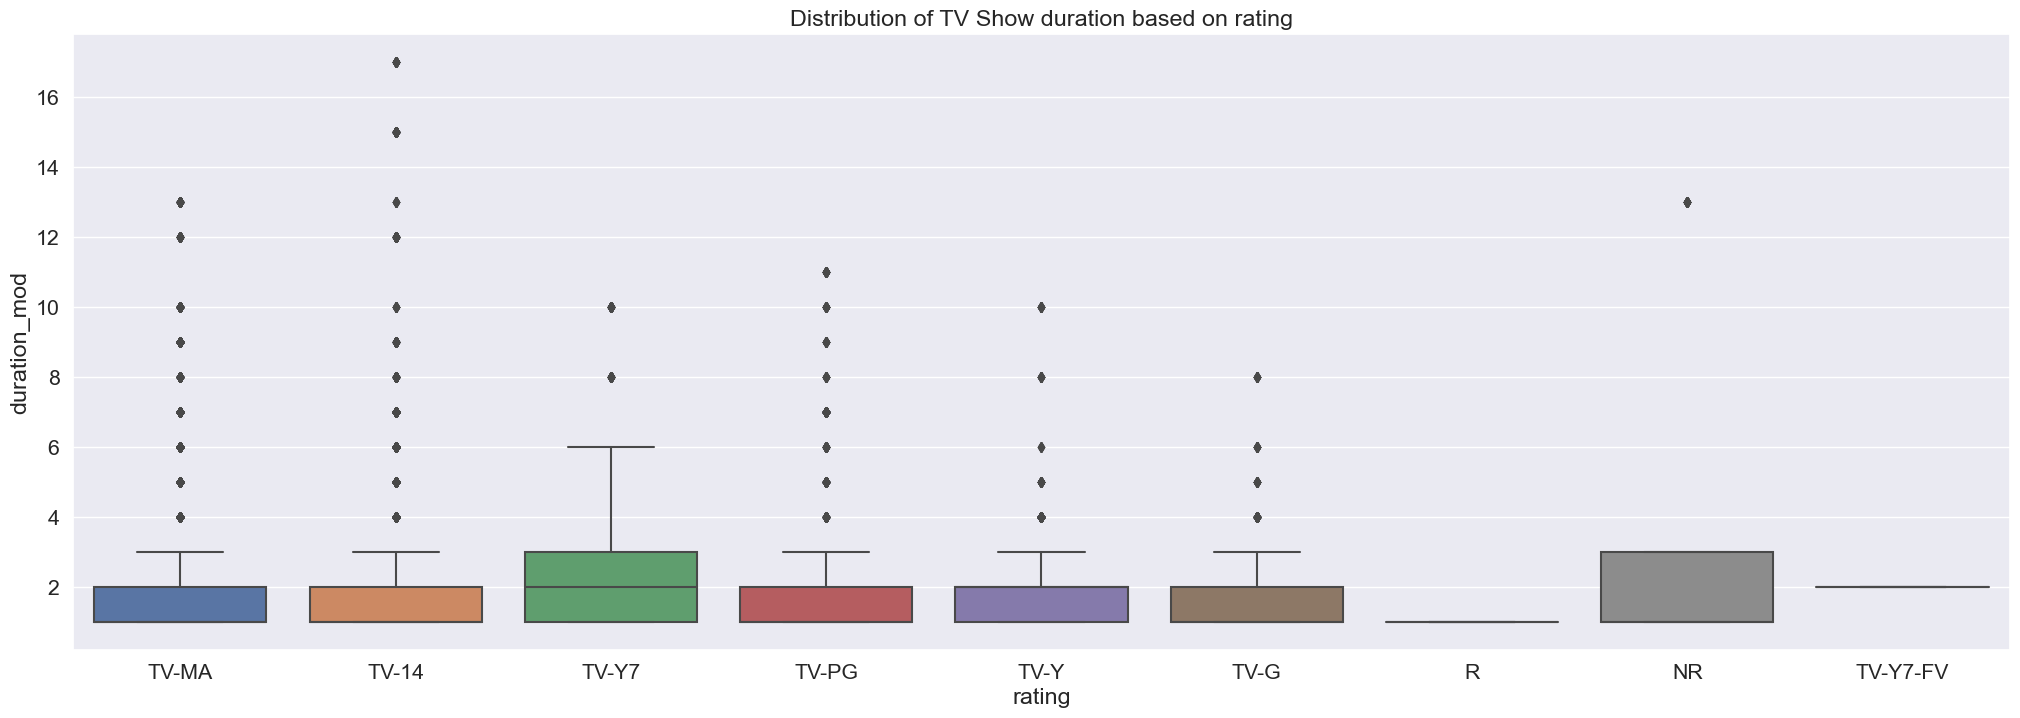

In [48]:
# Duration of Tv Shows by Rating
sns.boxplot(x=df[df['type'] == 'TV Show']['rating'], y=df[df['type'] == 'TV Show']['duration_mod'])
plt.title('Distribution of TV Show duration based on rating')
plt.show()

In [49]:
df_date = df[['date_added','month_added','year_added']]
df_date.dropna(inplace=True)

In [50]:
df.groupby('year_added')['title'].nunique()

year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      11
2014.0      24
2015.0      82
2016.0     429
2017.0    1188
2018.0    1649
2019.0    2016
2020.0    1879
2021.0    1498
Name: title, dtype: int64

<Axes: xlabel='year_added', ylabel='title'>

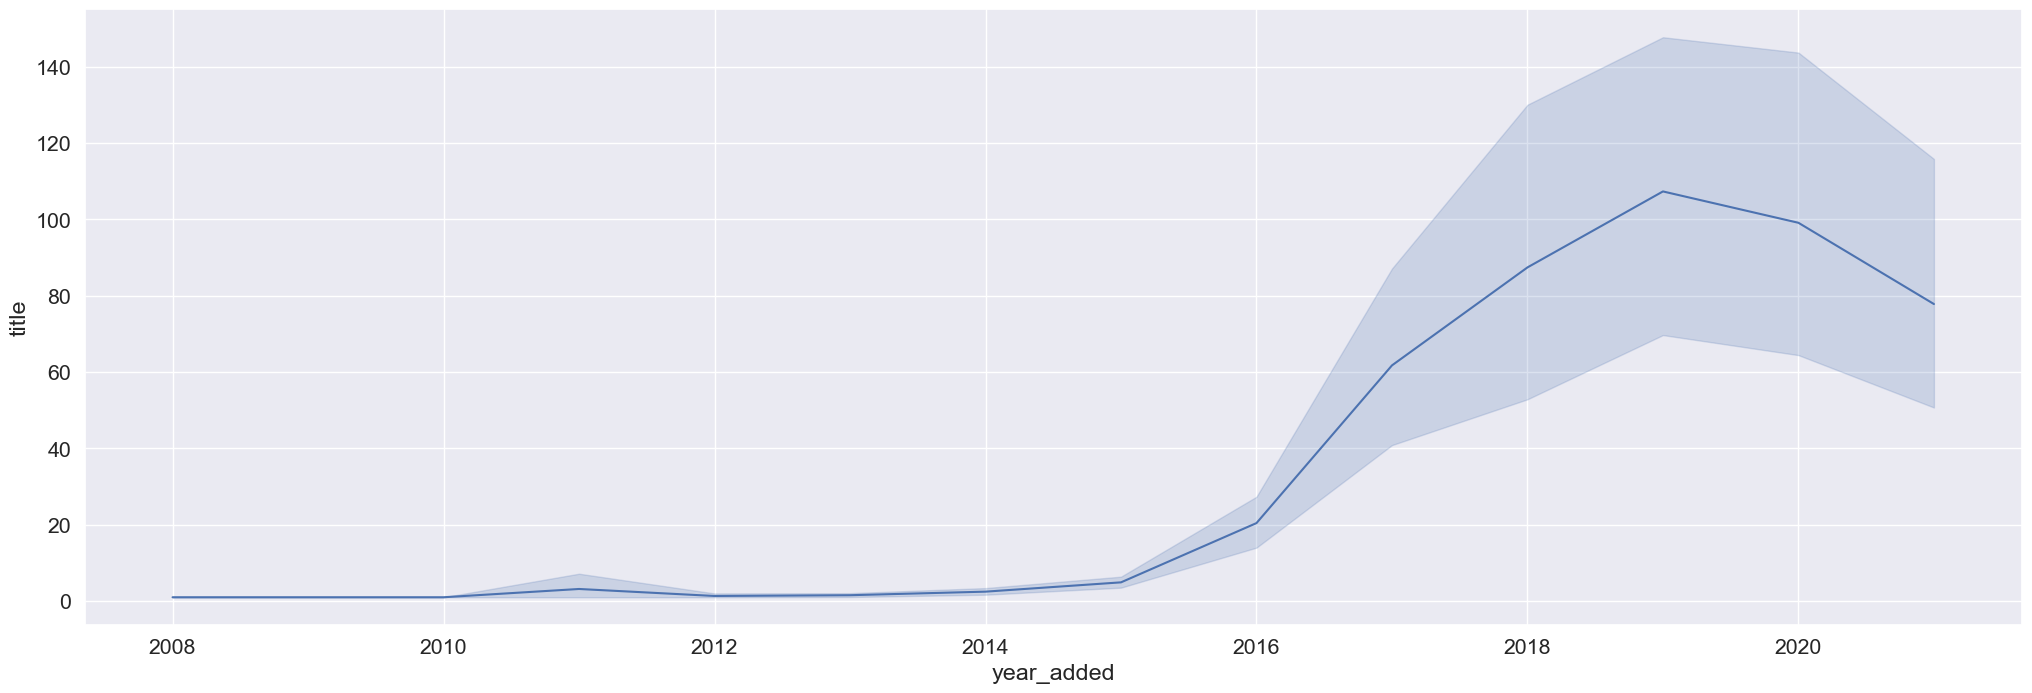

In [51]:
df_movies_shows = df.groupby(['year_added','listed_in'])['title'].nunique().reset_index()
#df_movies_shows(df_movies_shows['year_added']> 2014)

sns.lineplot(x=df_movies_shows['year_added'], y=df_movies_shows['title'])

In [52]:
#Recent year movies data based on genre
df_movies_shows[df_movies_shows['year_added'] == df['year_added'].max()].sort_values(by=['title'], ascending=False)

,year_added,listed_in,title
301,2021.0,Dramas,412
305,2021.0,International Movies,408
296,2021.0,Comedies,299
306,2021.0,International TV Shows,229
289,2021.0,Action & Adventure,196
323,2021.0,TV Dramas,137
293,2021.0,Children & Family Movies,122
322,2021.0,TV Comedies,118
313,2021.0,Romantic Movies,114
330,2021.0,Thrillers,112


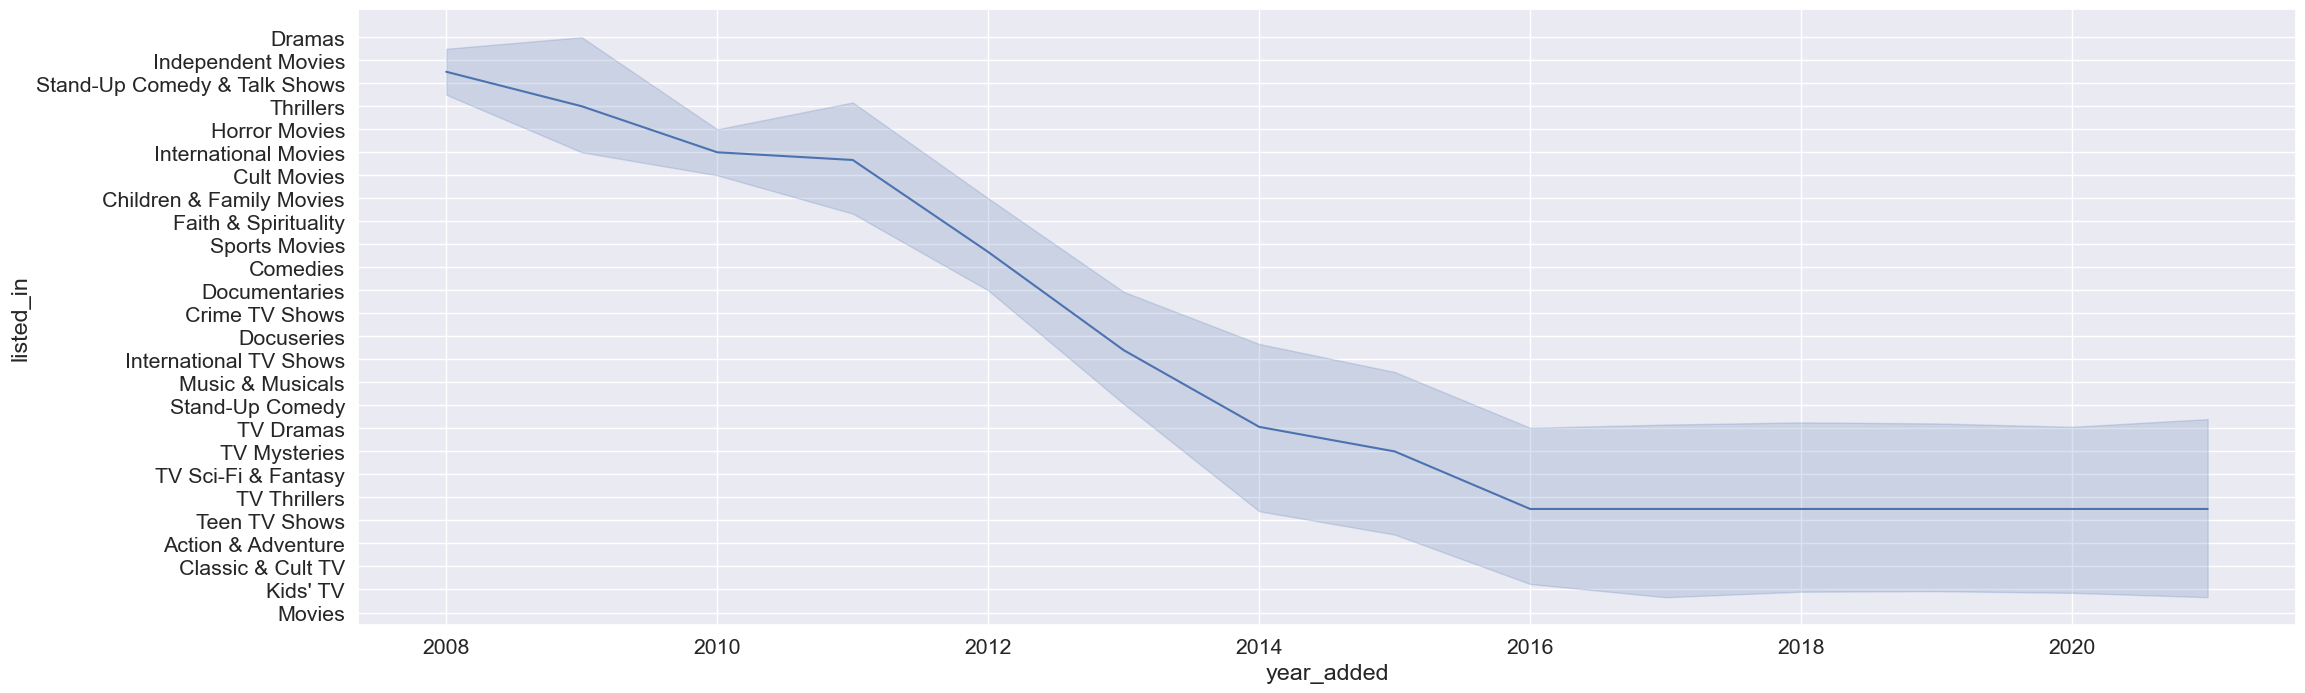

In [53]:
genre = 'Dramas'
sns.lineplot(x=df_movies_shows['year_added'], y= df_movies_shows['listed_in'])
plt.show()

## TV Shows Vs Movie Analysis

In [54]:
#Good that there is no null values.
df['type'].isnull().sum()

0

In [55]:
df_movies = df[df['type'] == 'Movie']
df_shows = df[df['type'] == 'TV Show']

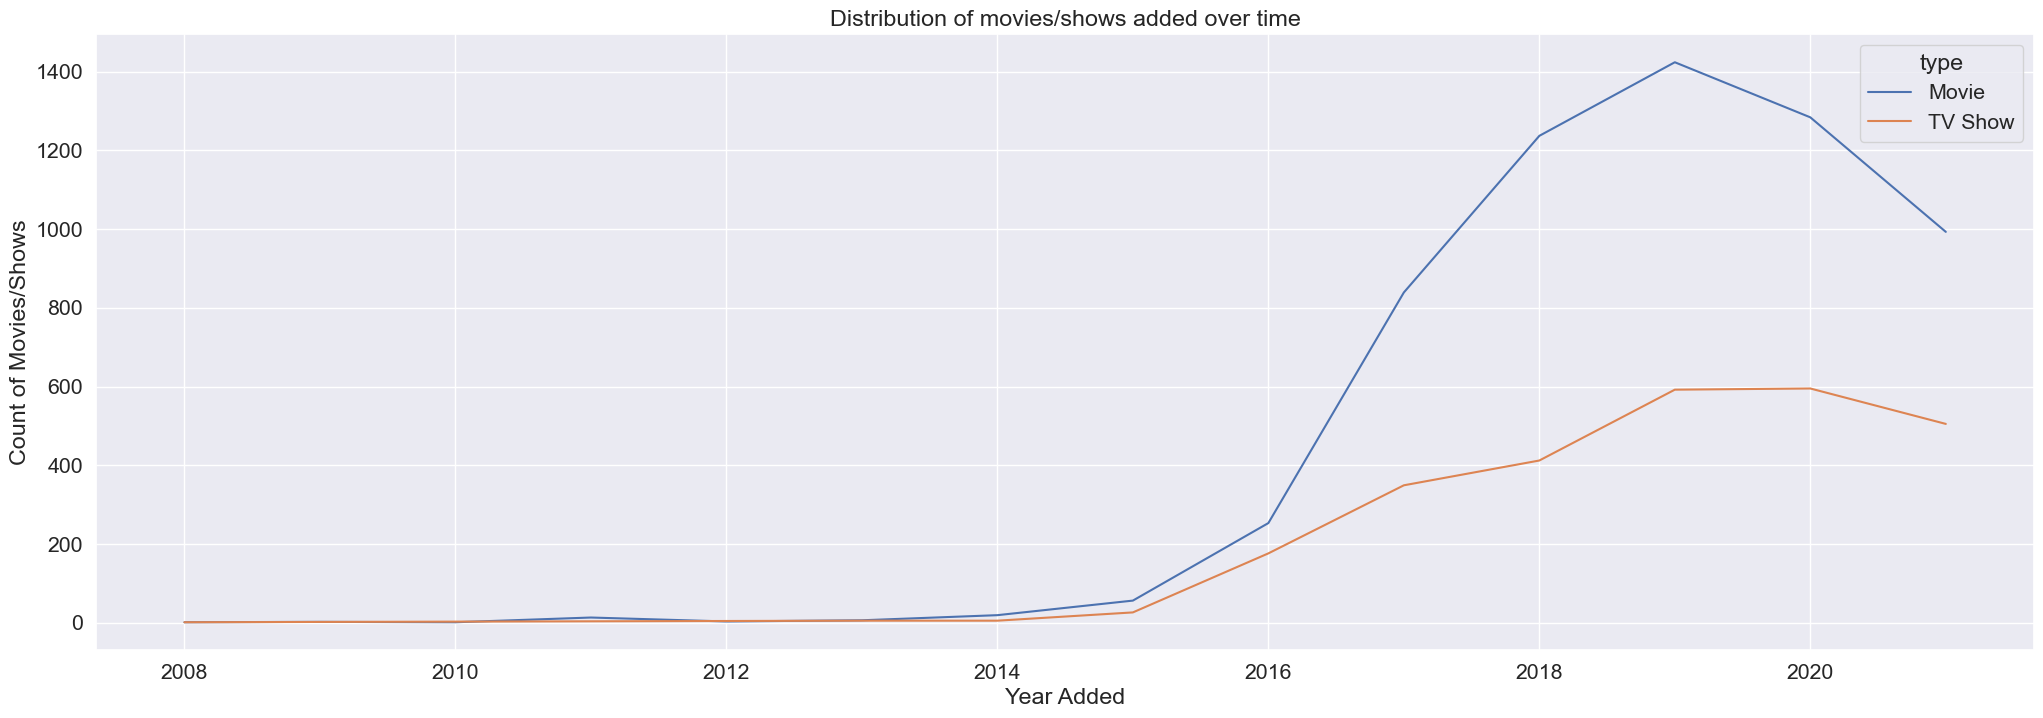

In [56]:
#Distribution of movies/shows added over time
df_series_type = df.groupby(['year_added','type'])['title'].nunique().reset_index()

sns.lineplot(x=df_series_type['year_added'], y=df_series_type['title'], hue=df_series_type['type'])
plt.title('Distribution of movies/shows added over time')
plt.xlabel('Year Added')
plt.ylabel('Count of Movies/Shows')
plt.show()

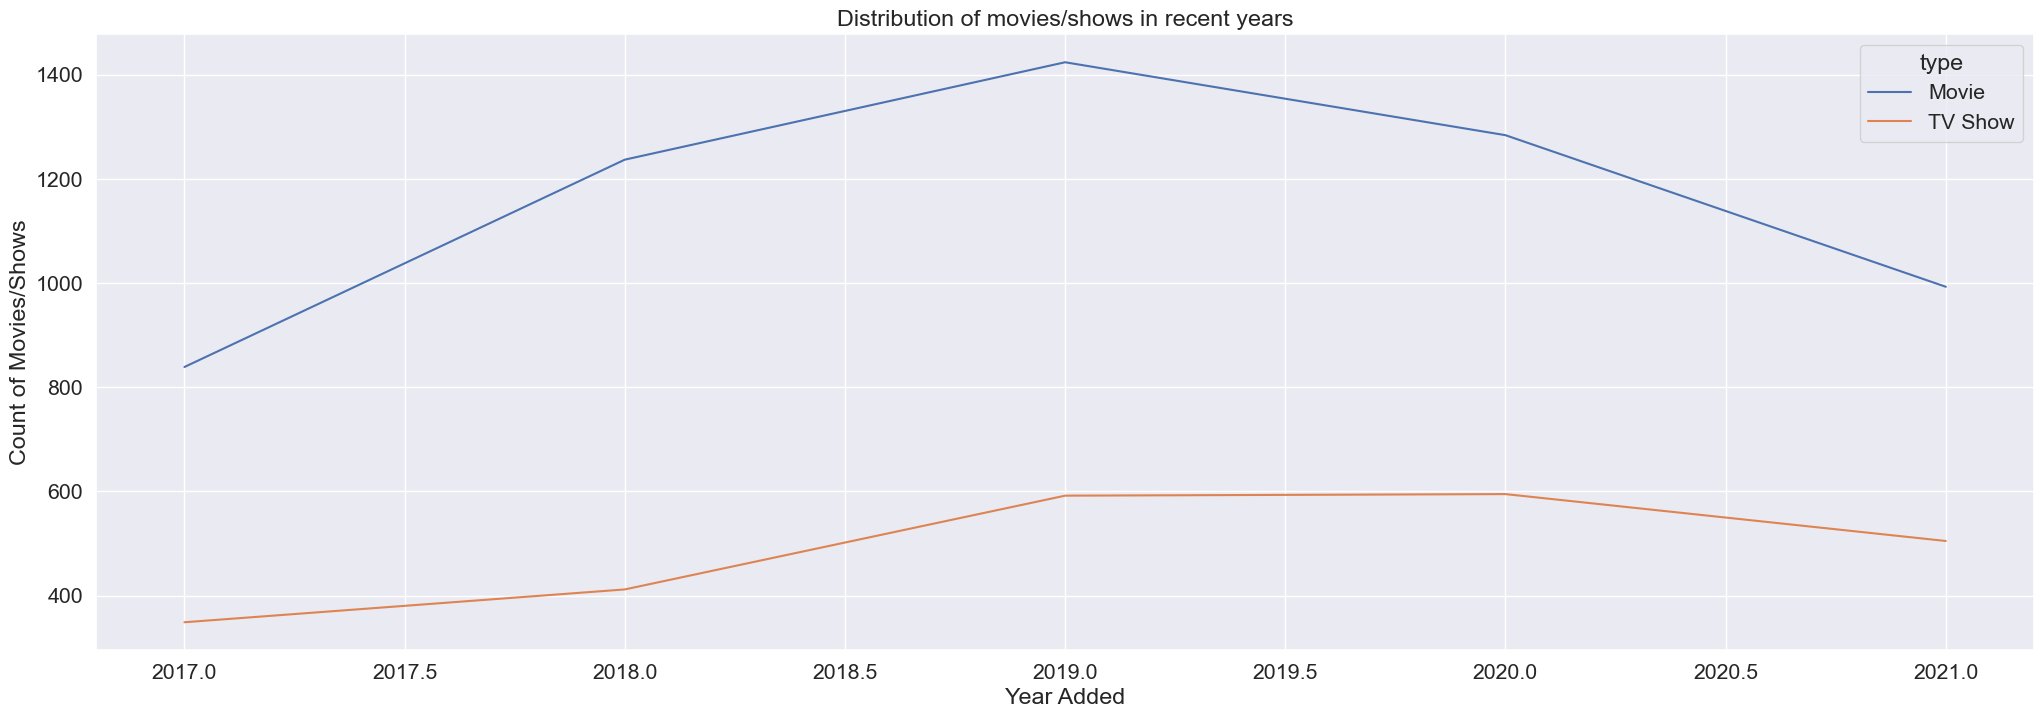

In [57]:
#Distribution of movies/shows in recent years

df_series_type = df.groupby(['year_added','type'])['title'].nunique().reset_index()
df_series_type = df_series_type[df_series_type['year_added'] > (df_series_type['year_added'].max() - 5)]

sns.lineplot(x=df_series_type['year_added'], y=df_series_type['title'], hue=df_series_type['type'])
plt.title('Distribution of movies/shows in recent years')
plt.xlabel('Year Added')
plt.ylabel('Count of Movies/Shows')
plt.show()